Step 0. Unzip enron1.zip into the current directory.

Step 1. Traverse the dataset and create a Pandas dataframe. This is already done for you and should run without any errors. You should recognize Pandas from task 1.

In [34]:
import pandas as pd
import os

def read_spam():
    category = 'spam'
    directory = './enron1/spam'
    return read_category(category, directory)

def read_ham():
    category = 'ham'
    directory = './enron1/ham'
    return read_category(category, directory)

def read_category(category, directory):
    emails = []
    for filename in os.listdir(directory):
        if not filename.endswith(".txt"):
            continue
        with open(os.path.join(directory, filename), 'r') as fp:
            try:
                content = fp.read()
                emails.append({'name': filename, 'content': content, 'category': category})
            except:
                print(f'skipped {filename}')
    return emails

ham = read_ham()
spam = read_spam()

df = pd.DataFrame.from_records(ham)
df = df.append(pd.DataFrame.from_records(spam))

skipped 0754.2004-04-01.GP.spam.txt
skipped 2526.2004-10-17.GP.spam.txt
skipped 3364.2005-01-01.GP.spam.txt
skipped 2248.2004-09-23.GP.spam.txt
skipped 5105.2005-08-31.GP.spam.txt
skipped 1414.2004-06-24.GP.spam.txt
skipped 4201.2005-04-05.GP.spam.txt
skipped 2698.2004-10-31.GP.spam.txt
skipped 2140.2004-09-13.GP.spam.txt
skipped 2042.2004-08-30.GP.spam.txt
skipped 3304.2004-12-26.GP.spam.txt
skipped 4142.2005-03-31.GP.spam.txt
skipped 4350.2005-04-23.GP.spam.txt
skipped 4566.2005-05-24.GP.spam.txt
skipped 2649.2004-10-27.GP.spam.txt


Step 2. Data cleaning is a critical part of machine learning. You and I can recognize that 'Hello' and 'hello' are the same word but a machine does not know this a priori. Therefore, we can 'help' the machine by conducting such normalization steps for it. Write a function `preprocessor` that takes in a string and replaces all non alphabet characters with a space and then lowercases the result.

In [35]:
import re

def preprocessor(e):
    e = re.sub(r'[^a-zA-Z]', ' ', e).lower()
    return e

Step 3. We will now train the machine learning model. All the functions that you will need are imported for you. The instructions explain how the work and hint at which functions to use. You will likely need to refer to the scikit learn documentation to see how exactly to invoke the functions. It will be handy to keep that tab open.

0.9738372093023255
              precision    recall  f1-score   support

         ham       0.98      0.98      0.98       707
        spam       0.95      0.97      0.96       325

    accuracy                           0.97      1032
   macro avg       0.97      0.97      0.97      1032
weighted avg       0.97      0.97      0.97      1032



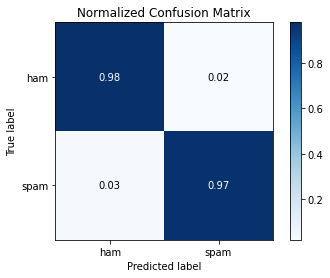

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import scikitplot

# The CountVectorizer converts a text sample into a vector (think of it as an array of floats).
# Each entry in the vector corresponds to a single word and the value is the number of times the word appeared.
# Instantiate a CountVectorizer. Make sure to include the preprocessor you previously wrote in the constructor.
# TODO
data = df['content']
labels = df['category']

vectorizer = CountVectorizer(preprocessor=preprocessor)


# Use train_test_split to split the dataset into a train dataset and a test dataset.
# The machine learning model learns from the train dataset.
# Then the trained model is tested on the test dataset to see if it actually learned anything.
# If it just memorized for example, then it would have a low accuracy on the test dataset and a high accuracy on the train dataset.
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)



# Use the vectorizer to transform the existing dataset into a form in which the model can learn from.
# Remember that simple machine learning models operate on numbers, which the CountVectorizer conveniently helped us do.
X_train_vectorized = vectorizer.fit_transform(X_train)


# Use the LogisticRegression model to fit to the train dataset.
# You may remember y = mx + b and Linear Regression from high school. Here, we fitted a scatter plot to a line.
# Logistic Regression is another form of regression. 
# However, Logistic Regression helps us determine if a point should be in category A or B, which is a perfect fit.
logreg = LogisticRegression(max_iter = 400)
logreg.fit(X_train_vectorized, y_train)


# Validate that the model has learned something.
# Recall the model operates on vectors. First transform the test set using the vectorizer. 
# Then generate the predictions.
X_test_vectorized = vectorizer.transform(X_test)
prediction = logreg.predict(X_test_vectorized)

# We now want to see how we have done. We will be using three functions.
# `accuracy_score` tells us how well we have done. 
# 90% means that every 9 of 10 entries from the test dataset were predicted accurately.
# The `confusion_matrix` is a 2x2 matrix that gives us more insight.
# The top left shows us how many ham emails were predicted to be ham (that's good!).
# The bottom right shows us how many spam emails were predicted to be spam (that's good!).
# The other two quadrants tell us the misclassifications.
# Finally, the `classification_report` gives us detailed statistics which you may have seen in a statistics class.

print(accuracy_score(y_test, prediction))
#print(confusion_matrix(y_test, prediction, normalize='true'))
scikitplot.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)
print(classification_report(y_test, prediction))



Step 4.

In [114]:
## Let's see which features (aka columns) the vectorizer created. 
# They should be all the words that were contained in the training dataset.
feature_names = vectorizer.get_feature_names_out()
print(feature_names)

# You may be wondering what a machine learning model is tangibly. It is just a collection of numbers. 
# You can access these numbers known as "coefficients" from the coef_ property of the model
# We will be looking at coef_[0] which represents the importance of each feature.
# What does importance mean in this context?
# Some words are more important than others for the model.
# It's nothing personal, just that spam emails tend to contain some words more frequently.
# This indicates to the model that having that word would make a new email more likely to be spam.
coef = logreg.coef_[0]
print(coef)


# Iterate over importance and find the top 10 positive features with the largest magnitude.
# Similarly, find the top 10 negative features with the largest magnitude.
# Positive features correspond to spam. Negative features correspond to ham.
# You will see that `http` is the strongest feature that corresponds to spam emails. 
# It makes sense. Spam emails often want you to click on a link.
importances = logreg.coef_[0]
feature_importances = zip(importances, feature_names)

fsort = sorted(feature_importances, reverse=True)

print("\nTop 10 Positive Feature Importances (SPAM):")
for importance, feature_name in fsort[:10]:
    print(f"SPAM: Feature: {feature_name}, Importance: {importance}")


print("\nTop 10 Negative Feature Importances (HAM):")
for importance, feature_name in reversed(fsort[-10:]):
    print(f"HAM: Feature: {feature_name}, Importance: {importance}")


['aa' 'aaa' 'aabda' ... 'zzn' 'zzocb' 'zzso']
[-2.72883698e-01  9.41670427e-05 -9.15632935e-03 ...  1.19458442e-06
  3.93131723e-04  7.67752313e-02]

Top 10 Positive Feature Importances (SPAM):
SPAM: Feature: http, Importance: 1.041851141290058
SPAM: Feature: prices, Importance: 0.8602334547049076
SPAM: Feature: no, Importance: 0.7909428190849007
SPAM: Feature: hello, Importance: 0.762771389058248
SPAM: Feature: more, Importance: 0.7504825629048126
SPAM: Feature: removed, Importance: 0.7233775761484039
SPAM: Feature: only, Importance: 0.7037049483139011
SPAM: Feature: pain, Importance: 0.6650347848357034
SPAM: Feature: remove, Importance: 0.6648427035005107
SPAM: Feature: paliourg, Importance: 0.6630311605599518

Top 10 Negative Feature Importances (HAM):
HAM: Feature: daren, Importance: -1.5362039005804096
HAM: Feature: enron, Importance: -1.5320565421039942
HAM: Feature: attached, Importance: -1.4833753264443335
HAM: Feature: doc, Importance: -1.3783587472921806
HAM: Feature: picture

Submission
1. Upload the jupyter notebook to Forage.

All Done!